__Purpose:__ Run FedAvg on all trial conditions.  Make a super global model updated over all trials?  Need a way to compare what the decs between different trials are like... a way that is NOT the norm since that's in the cost function
> Note that in NB199 I remade all the init conditions.  The below were not run with their appropriate inits, although since we are disregarding co-adaptivity it shouldn't technically matter.  It appears not to

In [1]:
import pandas as pd
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import copy

from experiment_params import *
from cost_funcs import *
from fl_sim_classes import *
import time
import pickle
from sklearn.decomposition import PCA

In [2]:
path = r'C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
implemented_client_training_methods = ['EtaGradStep', 'EtaScipyMinStep', 'FullScipyMinStep']
num_participants = 14

# For exclusion when plotting later on
bad_nodes = [1,3,13]

# Reminder of Conditions Order

NOTE: 

* **CONDITIONS** = array(['D_1', 'D_2', 'D_5', 'D_6', 'D_3', 'D_4', 'D_7','D_8']
* **LEARNING RATES:** alpha = 0.25 and 0.75; alpha = 0.25 for D1, D2, D5, D6; alpha = 0.75 for D3, D4, D7, D8
* **SMOOTHBATCH:** W_next = alpha*W_old + ((1 - alpha) * W_calc)

* **DECODER INIT:** pos for D1 - D4, neg for D5 - D8

* **PENALTY TERM:** $\lambda_E$ = 1e-6 for all, $\lambda_F$ = 1e-7 for all, $\lambda_D$ = 1e-3 for 1, 3, 5, 7 and 1e-4 for 2, 4, 6, 8 


| DECODER | ALPHA | PENALTY | DEC INIT |
| --- | --- | --- | --- |
| 1 | 0.25 | 1e-3 | + |
| 2 | 0.25 | 1e-4 | + |
| 3 | 0.75 | 1e-3 | + |
| 4 | 0.75 | 1e-4 | + |
| 5 | 0.25 | 1e-3 | - |
| 6 | 0.25 | 1e-4 | - |
| 7 | 0.75 | 1e-3 | - |
| 8 | 0.75 | 1e-4 | - |


# Verify Federated Set Up Runs

In [3]:
with open(path+cond0_filename, 'rb') as fp:
    cond0_training_and_labels_lst = pickle.load(fp)
    
with open(path+all_decs_init_filename, 'rb') as fp:
    init_decoders = pickle.load(fp)
cond0_init_decs = [dec[0, :, :] for dec in init_decoders]

In [4]:
D_0 = np.random.rand(2,64)
D_0_7 = np.random.rand(2,7)

# Federated Learning
## 1 Scipy Step, 500 Iterations
> Note that the thicker, lighter lines are the global model accuracies, whereas the thin lines are the local accuracies.

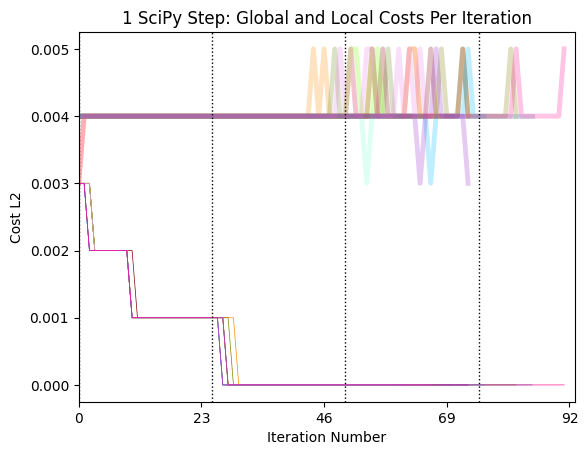

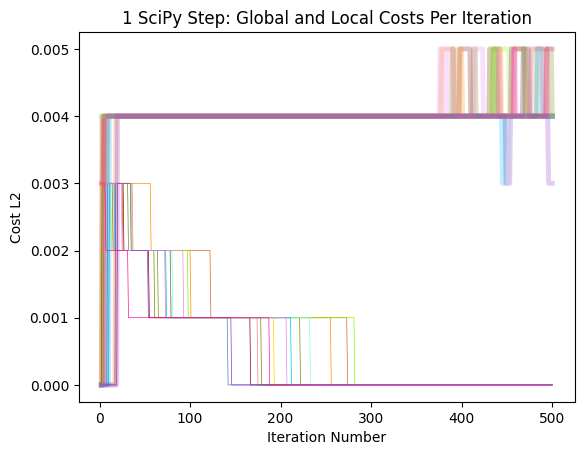

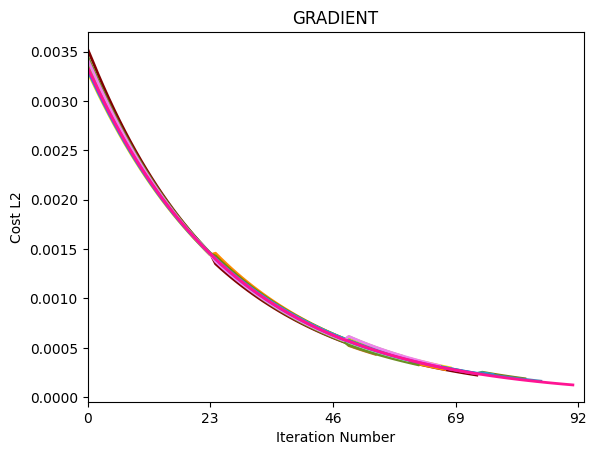

In [5]:
user_c1 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0) for i in range(14)]
global_c1 = Server(1, D_0_7, 'FedAvg', user_c1)

big_loop_iters = 500
for i in range(big_loop_iters):
    global_c1.execute_FL_loop()
    
condensed_external_plotting(user_c1, 'local', custom_title='1 SciPy Step: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c1, 'global', show_update_change=False, custom_title='1 SciPy Step: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c1, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

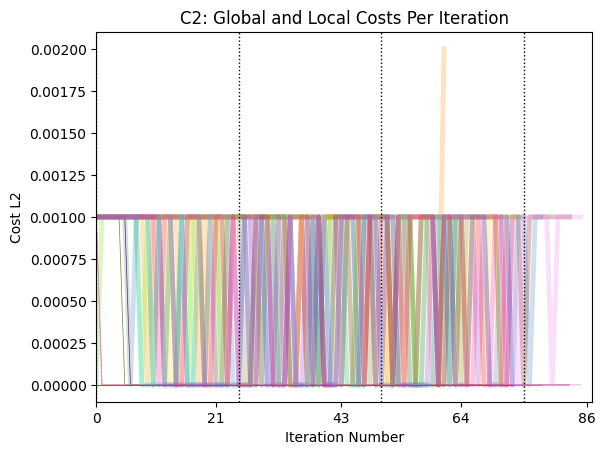

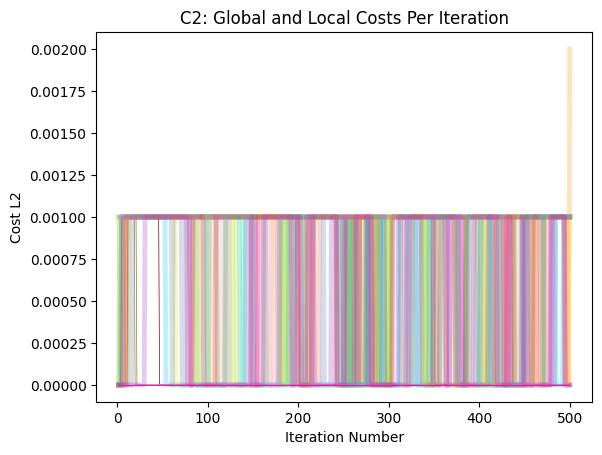

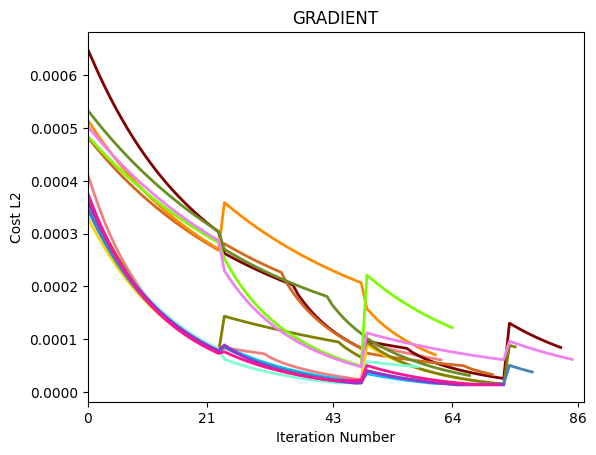

In [6]:
my_cond=2

user_c2 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c2 = Server(1, D_0_7, 'FedAvg', user_c2)

for i in range(big_loop_iters):
    global_c2.execute_FL_loop()
    
condensed_external_plotting(user_c2, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c2, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c2, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

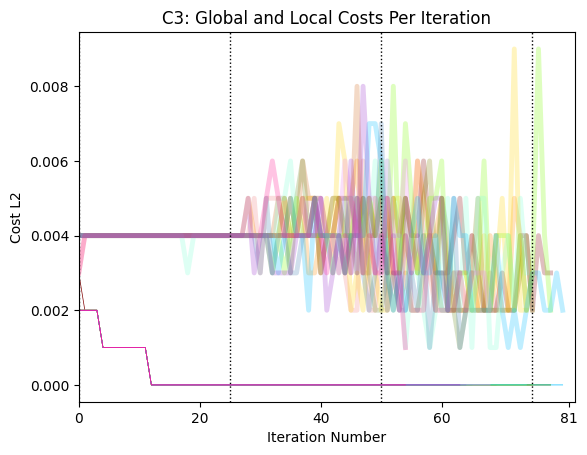

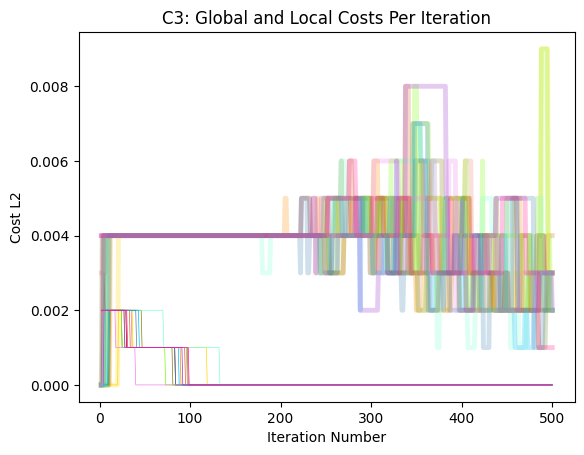

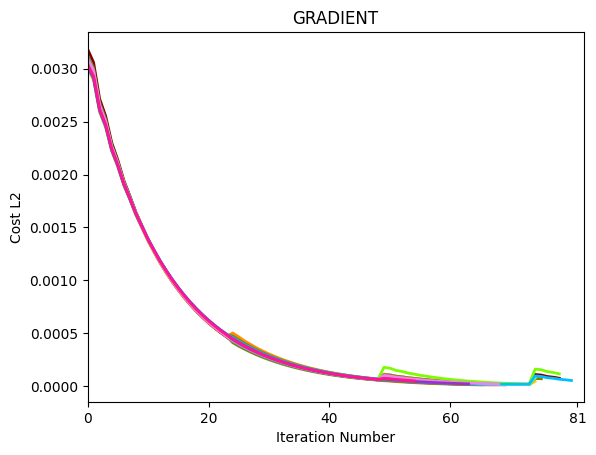

In [7]:
my_cond=3

user_c2 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c2 = Server(1, D_0_7, 'FedAvg', user_c2)

big_loop_iters = 500
for i in range(big_loop_iters):
    global_c2.execute_FL_loop()
    
condensed_external_plotting(user_c2, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c2, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c2, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

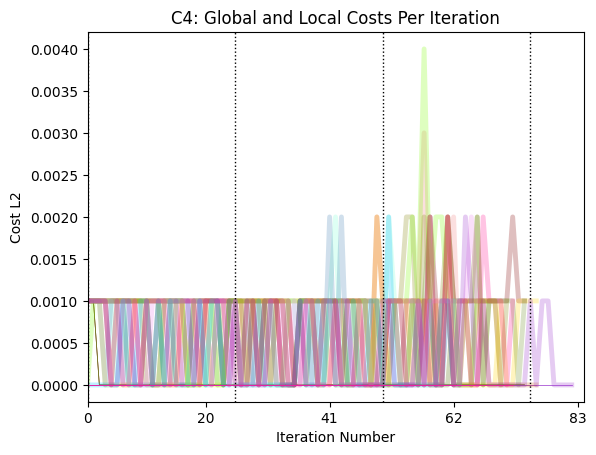

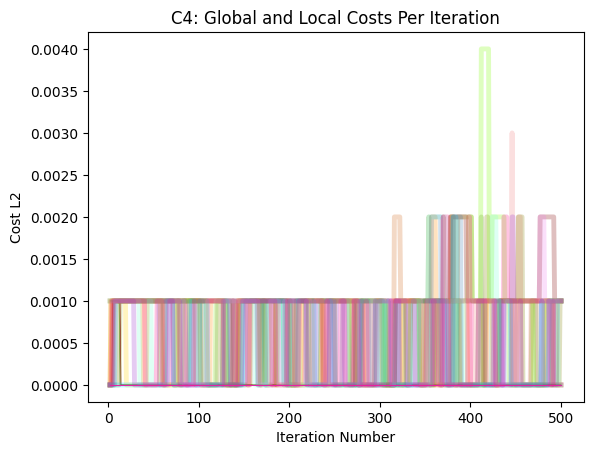

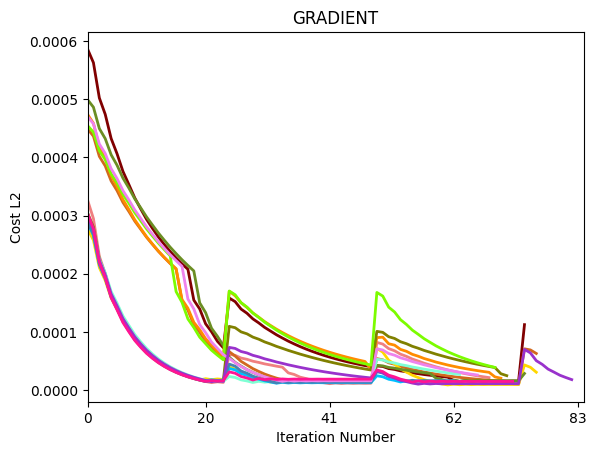

In [8]:
my_cond=4

user_c4 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c4 = Server(1, D_0_7, 'FedAvg', user_c4)

for i in range(big_loop_iters):
    global_c4.execute_FL_loop()
    
condensed_external_plotting(user_c4, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c4, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c4, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

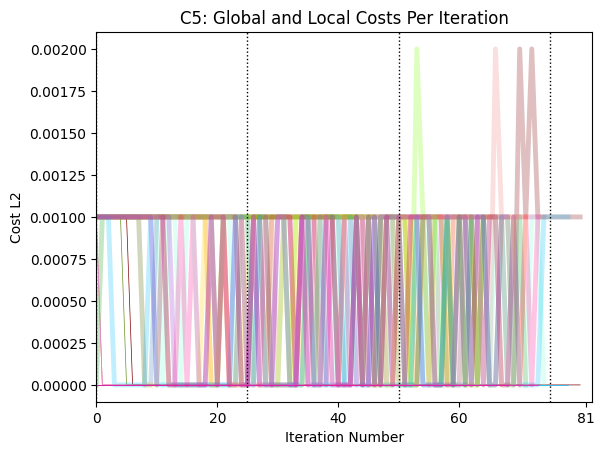

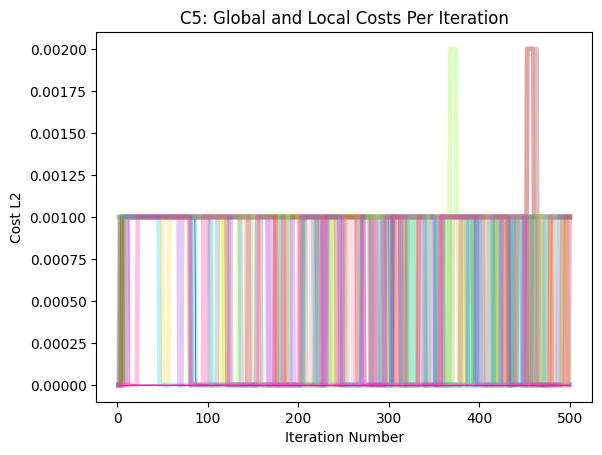

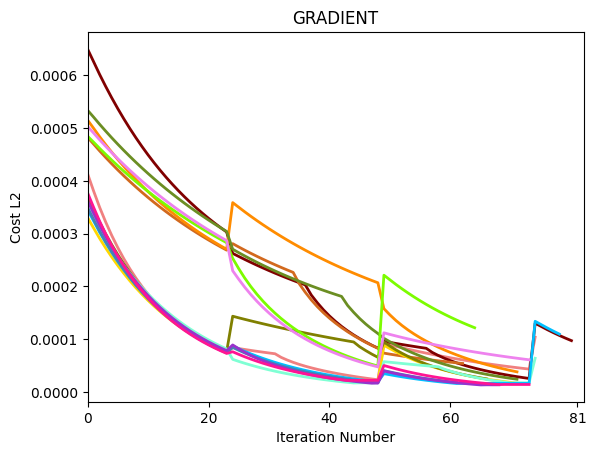

In [9]:
my_cond=5

user_c5 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c5 = Server(1, D_0_7, 'FedAvg', user_c5)

for i in range(big_loop_iters):
    global_c5.execute_FL_loop()
    
condensed_external_plotting(user_c5, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c5, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c5, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

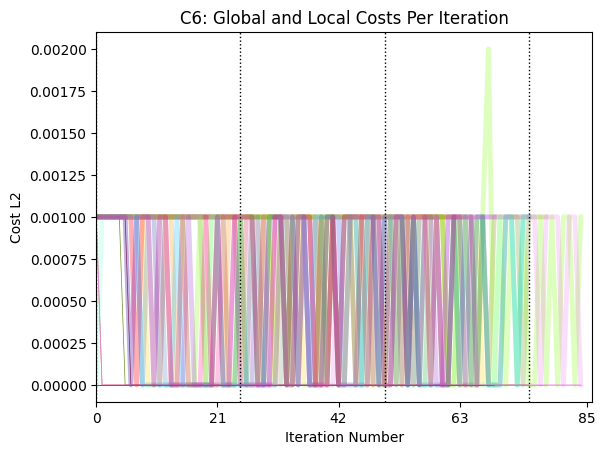

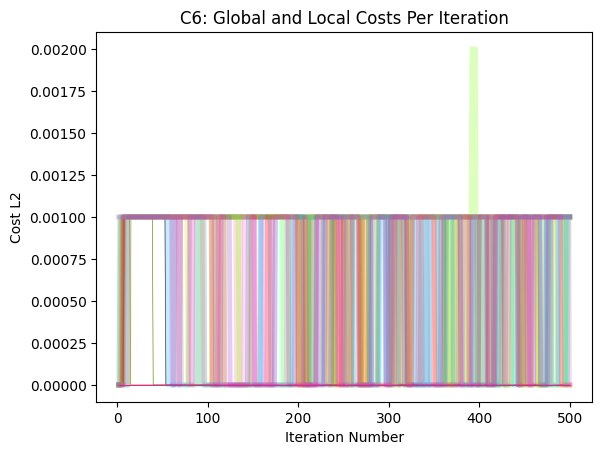

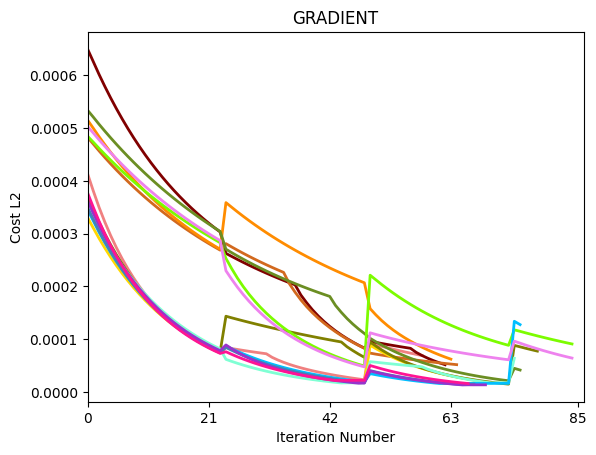

In [10]:
my_cond=6

user_c6 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c6 = Server(1, D_0_7, 'FedAvg', user_c6)

for i in range(big_loop_iters):
    global_c6.execute_FL_loop()
    
condensed_external_plotting(user_c6, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c6, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c6, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

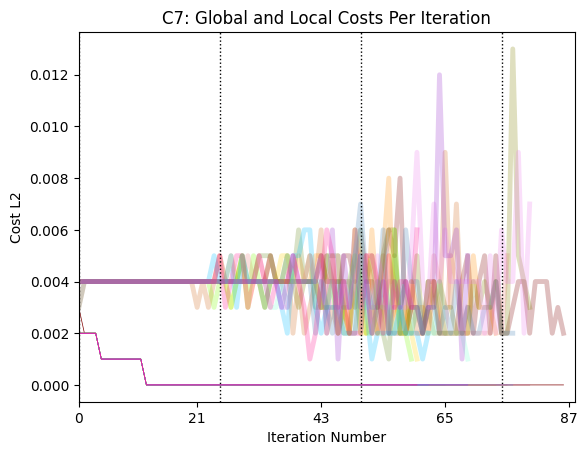

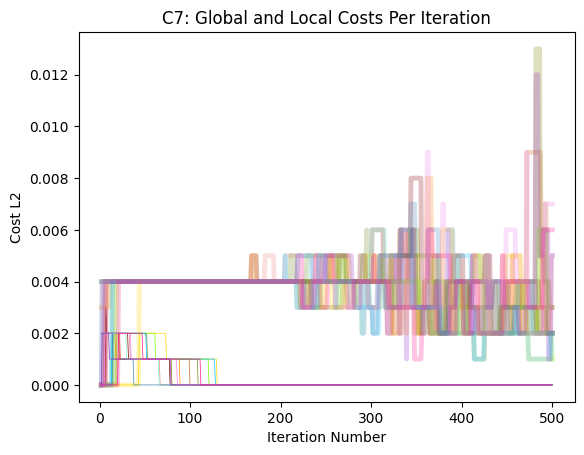

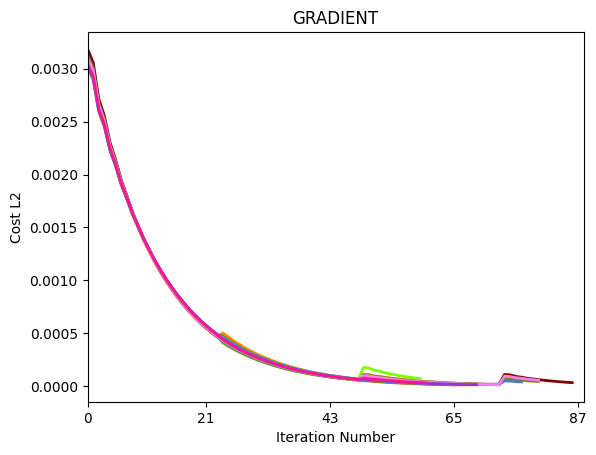

In [11]:
my_cond=7

user_c7 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c7 = Server(1, D_0_7, 'FedAvg', user_c7)

for i in range(big_loop_iters):
    global_c7.execute_FL_loop()
    
condensed_external_plotting(user_c7, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c7, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c7, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

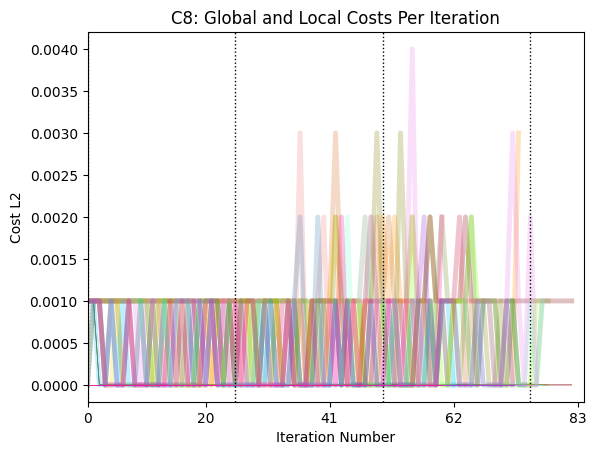

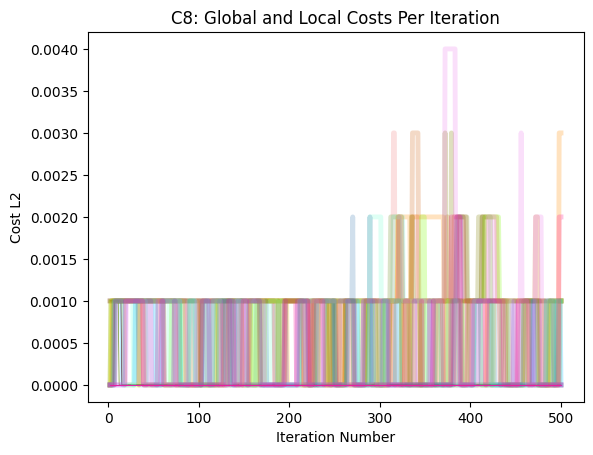

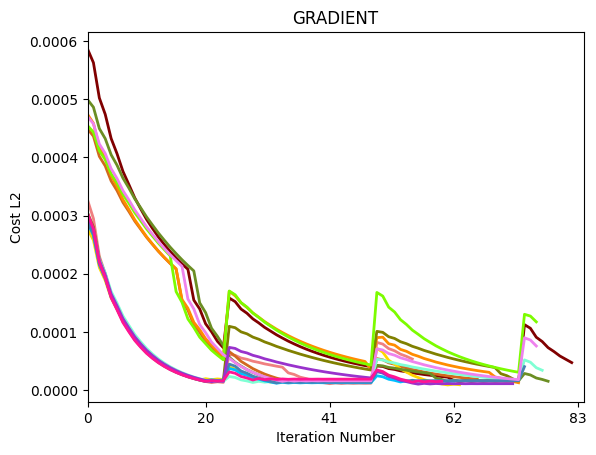

In [12]:
my_cond=8

user_c8 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', condition_number=my_cond, delay_scaling=0) for i in range(14)]
global_c8 = Server(1, D_0_7, 'FedAvg', user_c8)

for i in range(big_loop_iters):
    global_c8.execute_FL_loop()
    
condensed_external_plotting(user_c8, 'local', custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c8, 'global', show_update_change=False, custom_title=f'C{my_cond}: Global and Local Costs Per Iteration')
condensed_external_plotting(user_c8, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

## Ought to test model from one condition on another condition
> Also ought to try and train global models over multiple conditions to simulate more users... <br>
> Also ought to train global model over all conditions of one user to see if we get a super global model